# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
#Observations
#1.It appears that the warmest latitude is slightly above the equator.
#2.The data is however fairly well distributed so that as you go away from the equator you go down in temperature.
#3. The norther hemisphere appears to have more cities with high cloudiness. Especially as you move to the higher latitudes. 


# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats
import openweathermapy as weather

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cloudiness = []
country = []
date = []
humidity = []
temperature = []
lat = []
long = []
wind = []
cities2 = []

In [5]:
count = 1
weatherpy_df = pd.DataFrame(columns = ["City","Lat", "Lon","Max Temp","Humidity", "Cloudiness","Wind Speed","Country","Date"])
for city in cities:
    try:
        count = count + 1 
        city1 = city.replace(" ","_")
        url = f'https://api.openweathermap.org/data/2.5/weather?q={city1}&APPID={weather_api_key}'
        print(f'Processing City #{count}, {city}')
        print(url)
        response = requests.get(url).json()
        cities2.append(city)
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temperature.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
    except:
        print("City not found")
        continue
        
weatherpy_df.head()

Processing City #2, jamestown
https://api.openweathermap.org/data/2.5/weather?q=jamestown&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #3, bluff
https://api.openweathermap.org/data/2.5/weather?q=bluff&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #4, kavieng
https://api.openweathermap.org/data/2.5/weather?q=kavieng&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #5, port lincoln
https://api.openweathermap.org/data/2.5/weather?q=port_lincoln&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #6, vardo
https://api.openweathermap.org/data/2.5/weather?q=vardo&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #7, cidreira
https://api.openweathermap.org/data/2.5/weather?q=cidreira&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #8, mataura
https://api.openweathermap.org/data/2.5/weather?q=mataura&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #9, san cristobal
https://api.openweathermap.org/data/2.5/weather?q=san_cristobal&APPI

Processing City #65, saint pete beach
https://api.openweathermap.org/data/2.5/weather?q=saint_pete_beach&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #66, hermanus
https://api.openweathermap.org/data/2.5/weather?q=hermanus&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #67, pavlovsk
https://api.openweathermap.org/data/2.5/weather?q=pavlovsk&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #68, sherlovaya gora
https://api.openweathermap.org/data/2.5/weather?q=sherlovaya_gora&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #69, barentsburg
https://api.openweathermap.org/data/2.5/weather?q=barentsburg&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #70, lata
https://api.openweathermap.org/data/2.5/weather?q=lata&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #71, maghama
https://api.openweathermap.org/data/2.5/weather?q=maghama&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #7

City not found
Processing City #127, la ronge
https://api.openweathermap.org/data/2.5/weather?q=la_ronge&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #128, cowansville
https://api.openweathermap.org/data/2.5/weather?q=cowansville&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #129, batagay
https://api.openweathermap.org/data/2.5/weather?q=batagay&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #130, tumannyy
https://api.openweathermap.org/data/2.5/weather?q=tumannyy&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #131, opuwo
https://api.openweathermap.org/data/2.5/weather?q=opuwo&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #132, pevek
https://api.openweathermap.org/data/2.5/weather?q=pevek&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #133, the valley
https://api.openweathermap.org/data/2.5/weather?q=the_valley&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #134, abha
https://api.op

Processing City #189, alindao
https://api.openweathermap.org/data/2.5/weather?q=alindao&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #190, formoso do araguaia
https://api.openweathermap.org/data/2.5/weather?q=formoso_do_araguaia&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #191, saint anthony
https://api.openweathermap.org/data/2.5/weather?q=saint_anthony&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #192, toliary
https://api.openweathermap.org/data/2.5/weather?q=toliary&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #193, chokurdakh
https://api.openweathermap.org/data/2.5/weather?q=chokurdakh&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #194, finschhafen
https://api.openweathermap.org/data/2.5/weather?q=finschhafen&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #195, vila velha
https://api.openweathermap.org/data/2.5/weather?q=vila_velha&APPID=8e3949acec80d408d6ccf93299ae52a0
City not f

Processing City #250, aflu
https://api.openweathermap.org/data/2.5/weather?q=aflu&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #251, duki
https://api.openweathermap.org/data/2.5/weather?q=duki&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #252, tahe
https://api.openweathermap.org/data/2.5/weather?q=tahe&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #253, jardim
https://api.openweathermap.org/data/2.5/weather?q=jardim&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #254, port augusta
https://api.openweathermap.org/data/2.5/weather?q=port_augusta&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #255, saleaula
https://api.openweathermap.org/data/2.5/weather?q=saleaula&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #256, tsihombe
https://api.openweathermap.org/data/2.5/weather?q=tsihombe&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #257, mount isa
https://api.openweatherma

Processing City #312, gazojak
https://api.openweathermap.org/data/2.5/weather?q=gazojak&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #313, amga
https://api.openweathermap.org/data/2.5/weather?q=amga&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #314, hihifo
https://api.openweathermap.org/data/2.5/weather?q=hihifo&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #315, garhi khairo
https://api.openweathermap.org/data/2.5/weather?q=garhi_khairo&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #316, kawana waters
https://api.openweathermap.org/data/2.5/weather?q=kawana_waters&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #317, maracas
https://api.openweathermap.org/data/2.5/weather?q=maracas&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #318, severo-kurilsk
https://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #319, palmer
https://a

Processing City #374, hamilton
https://api.openweathermap.org/data/2.5/weather?q=hamilton&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #375, umm durman
https://api.openweathermap.org/data/2.5/weather?q=umm_durman&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #376, port moresby
https://api.openweathermap.org/data/2.5/weather?q=port_moresby&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #377, chern
https://api.openweathermap.org/data/2.5/weather?q=chern&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #378, birjand
https://api.openweathermap.org/data/2.5/weather?q=birjand&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #379, teya
https://api.openweathermap.org/data/2.5/weather?q=teya&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #380, tuy hoa
https://api.openweathermap.org/data/2.5/weather?q=tuy_hoa&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #381, sinnamary
https://api.openweathermap

Processing City #437, bykovo
https://api.openweathermap.org/data/2.5/weather?q=bykovo&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #438, spirit river
https://api.openweathermap.org/data/2.5/weather?q=spirit_river&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #439, jining
https://api.openweathermap.org/data/2.5/weather?q=jining&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #440, bentiu
https://api.openweathermap.org/data/2.5/weather?q=bentiu&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #441, rocha
https://api.openweathermap.org/data/2.5/weather?q=rocha&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #442, irkutsk
https://api.openweathermap.org/data/2.5/weather?q=irkutsk&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #443, mrirt
https://api.openweathermap.org/data/2.5/weather?q=mrirt&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #444, green river
https://api.openweathermap.org/data/2.5/weather?q=g

Processing City #499, makung
https://api.openweathermap.org/data/2.5/weather?q=makung&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #500, vanavara
https://api.openweathermap.org/data/2.5/weather?q=vanavara&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #501, palabuhanratu
https://api.openweathermap.org/data/2.5/weather?q=palabuhanratu&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #502, nouadhibou
https://api.openweathermap.org/data/2.5/weather?q=nouadhibou&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #503, houma
https://api.openweathermap.org/data/2.5/weather?q=houma&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #504, zhezkazgan
https://api.openweathermap.org/data/2.5/weather?q=zhezkazgan&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #505, brae
https://api.openweathermap.org/data/2.5/weather?q=brae&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #506, la primavera
https://api.openweathermap.org/d

Processing City #562, ketchikan
https://api.openweathermap.org/data/2.5/weather?q=ketchikan&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #563, bitung
https://api.openweathermap.org/data/2.5/weather?q=bitung&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #564, kurunegala
https://api.openweathermap.org/data/2.5/weather?q=kurunegala&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #565, kortkeros
https://api.openweathermap.org/data/2.5/weather?q=kortkeros&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #566, lubao
https://api.openweathermap.org/data/2.5/weather?q=lubao&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #567, handwara
https://api.openweathermap.org/data/2.5/weather?q=handwara&APPID=8e3949acec80d408d6ccf93299ae52a0
City not found
Processing City #568, nagato
https://api.openweathermap.org/data/2.5/weather?q=nagato&APPID=8e3949acec80d408d6ccf93299ae52a0
Processing City #569, olga
https://api.openweathermap.org/data/2.5/weather?q=olga&APPID=

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [44]:
weather_dictionary = {
    "City":cities2,
    "Cloudiness":cloudiness,
    "Date":date,
    "Country":country,
    "Humidity":humidity,
    "Temperature":temperature,
    "Latitude":lat,
    "Longtitude":long,
    "Wind Speed":wind
}
weather_clean = pd.DataFrame.from_dict(weather_dictionary,orient='index')
weather_clean=weather_clean.transpose()
weather_clean = weather_clean.dropna()
weather_clean.count()


weather_clean.to_csv(r"../output_data/Weather.csv")




In [ ]:
weather_clean.max()["Humidity"]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

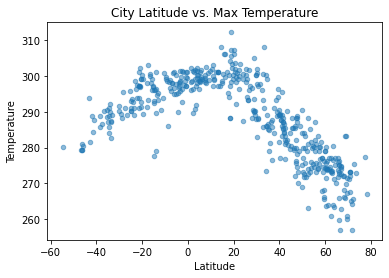

In [13]:
weather_clean.plot(kind='scatter',x='Latitude',y='Temperature',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Max Temperature')
plt.savefig("../output_data/Latitude vs. Temperature.png")

## Latitude vs. Humidity Plot

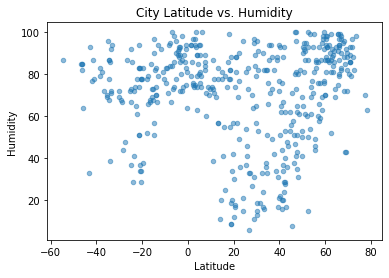

In [14]:
weather_clean.plot(kind='scatter',x='Latitude',y='Humidity',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity')
plt.savefig("../output_data/Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

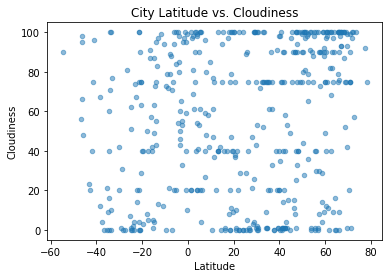

In [15]:
weather_clean.plot(kind='scatter',x='Latitude',y='Cloudiness',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness') 
plt.savefig("../output_data/Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

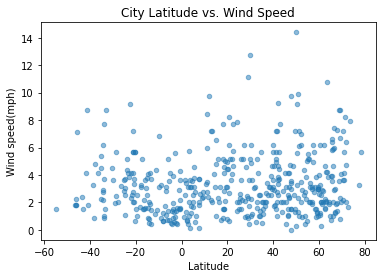

In [16]:
weather_clean.plot(kind='scatter',x='Latitude',y='Wind Speed',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind speed(mph)')
plt.title('City Latitude vs. Wind Speed')
plt.savefig("../output_data/Latitude vs. Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

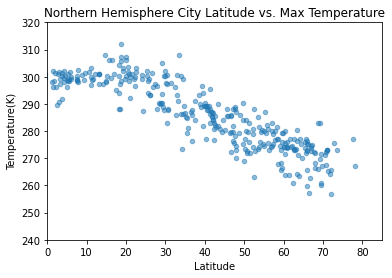

<Figure size 432x288 with 0 Axes>

In [68]:
weather_clean['Latitude']=weather_clean['Latitude'].astype(float)
weather_clean['Temperature']=weather_clean['Temperature'].astype(float)
y_axis=weather_clean['Latitude']
x_axis=weather_clean['Temperature']
weather_clean.plot(kind='scatter',x='Latitude',y='Temperature',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature(K)')
plt.title('Northern Hemisphere City Latitude vs. Max Temperature')
plt.xlim([0,85])
plt.ylim([240,320])
  
slope, intercept,r,p,se = stats.linregress(x_axis,y_axis)
plt.plot(intercept + slope*x_axis)
plt.show()



plt.savefig("../output_data/Latitude vs. Temperature(northern hemisphere).png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

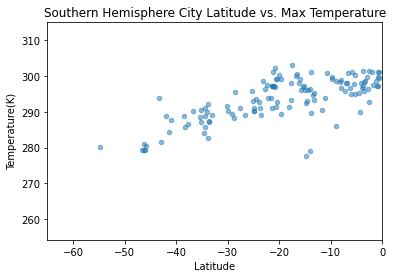

In [33]:
weather_clean.plot(kind='scatter',x='Latitude',y='Temperature',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Temperature(K)')
plt.title('Southern Hemisphere City Latitude vs. Max Temperature')
plt.xlim([-65,0])
plt.savefig("../output_data/Latitude vs. Temperature(southern hemisphere).png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

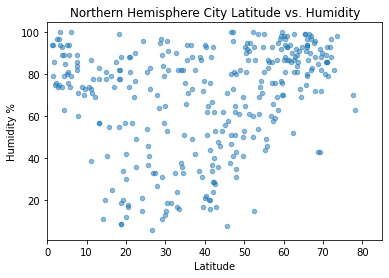

In [32]:
weather_clean.plot(kind='scatter',x='Latitude',y='Humidity',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere City Latitude vs. Humidity')
plt.xlim([0,85])

plt.savefig("../output_data/Latitude vs. Humidity(northern hemisphere).png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

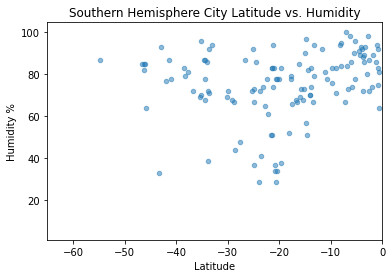

In [31]:
weather_clean.plot(kind='scatter',x='Latitude',y='Humidity',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere City Latitude vs. Humidity')
plt.xlim([-65,0])

plt.savefig("../output_data/Latitude vs. Humidity(southern hemisphere).png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

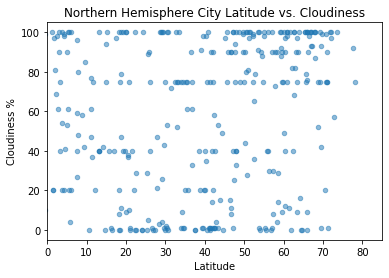

In [30]:
weather_clean.plot(kind='scatter',x='Latitude',y='Cloudiness',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Northern Hemisphere City Latitude vs. Cloudiness') 
plt.xlim([0,85])

plt.savefig("../output_data/Latitude vs. Cloudiness(northern hemisphere).png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

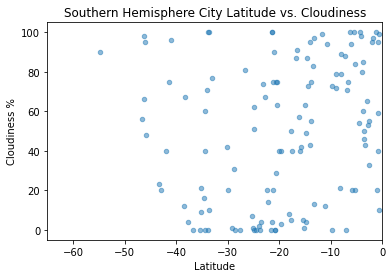

In [29]:
weather_clean.plot(kind='scatter',x='Latitude',y='Cloudiness',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Southern Hemisphere City Latitude vs. Cloudiness') 
plt.xlim([-65,0])

plt.savefig("../output_data/Latitude vs. Cloudiness(southern hemisphere).png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

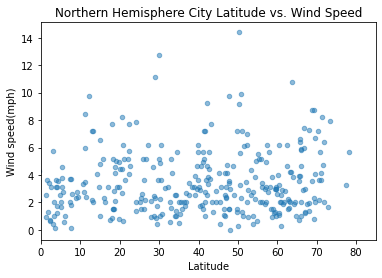

In [27]:
weather_clean.plot(kind='scatter',x='Latitude',y='Wind Speed',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind speed(mph)')
plt.title('Northern Hemisphere City Latitude vs. Wind Speed')
plt.xlim([0,85])

plt.savefig("../output_data/Latitude vs. Wind Speed(northern hemisphere).png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

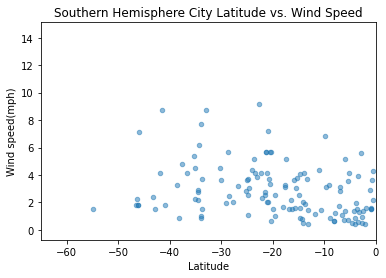

In [28]:
weather_clean.plot(kind='scatter',x='Latitude',y='Wind Speed',alpha=.5)
plt.xlabel('Latitude')
plt.ylabel('Wind speed(mph)')
plt.title('Southern Hemisphere City Latitude vs. Wind Speed')
plt.xlim([-65,0])

plt.savefig("../output_data/Latitude vs. Wind Speed(southern hemisphere).png")